## Activity 4.1

#### 1. Stage data

In [3]:
import numpy as np, pandas as pd
import matplotlib.pyplot as plt, seaborn as sns

data0 = pd.read_csv('Clothing_customers.csv')
data0.head()

,income,age,days_since_purchase,annual_spend
0,37453,48,504,4441
1,50775,50,566,4239
2,71047,41,326,5834
3,52239,52,259,5456
4,112343,27,279,1749


#### 2. Standardize

In [4]:
cluster_cols = data0.columns
data_scaled = data0.copy()

In [5]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled[cluster_cols] = scaler.fit_transform(data0[cluster_cols])

#### 3. Visualize using PCA

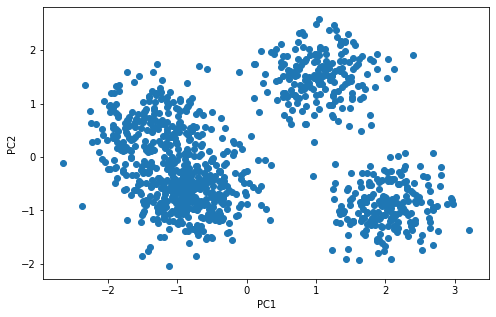

In [6]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(data_scaled[cluster_cols])

data_scaled['pc1'] = pca_res[:,0]
data_scaled['pc2'] = pca_res[:,1]

plt.figure(figsize=[8,5])
plt.scatter(data_scaled.pc1, data_scaled.pc2)
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### 4. Choosing number of customer using visual inspection: perform clustering in a loop using 2 to 7 clusters and visualize the resulting plots.

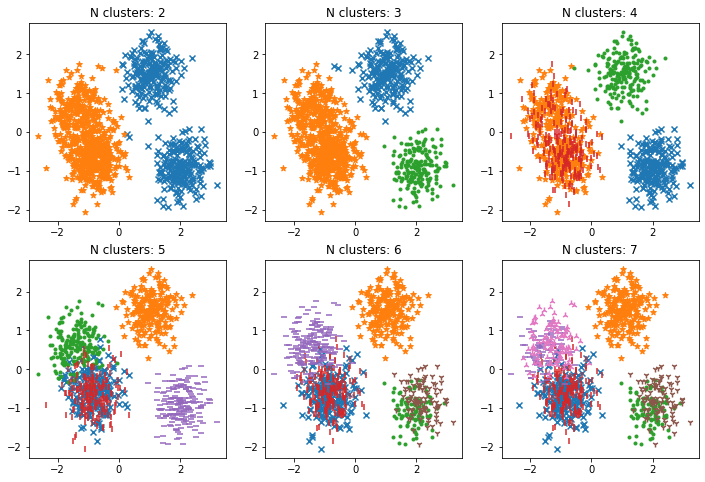

In [7]:
from sklearn.cluster import KMeans

markers = ['x', '*', '.', '|', '_', '1', '2']

plt.figure(figsize=[12,8])
for n in range(2,8):
    model = KMeans(n_clusters=n, random_state=42)
    data_scaled['Cluster']= model.fit_predict(data_scaled[cluster_cols])
    
    plt.subplot(2,3, n-1)
    for clust in range(n):
        temp = data_scaled[data_scaled.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, marker=markers[clust])
        plt.title("N clusters: "+str(n))

plt.show()

#### 5. Elow method on SSE/ Inertia

In [8]:
inertia_scores = []

for K in range(2,11):
    inertia = KMeans(n_clusters=K, random_state=42).fit(data_scaled).inertia_
    inertia_scores.append(inertia)

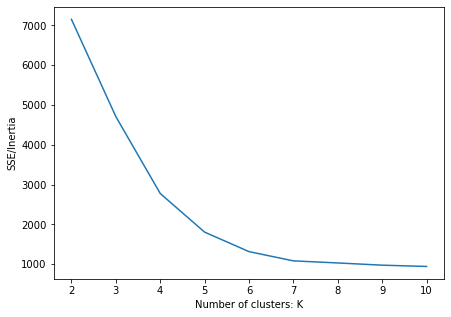

In [9]:
plt.figure(figsize=[7,5])
plt.plot(range(2,11), inertia_scores)
plt.xlabel("Number of clusters: K")
plt.ylabel('SSE/Inertia')
plt.show()

## Activity 4.2 - Bank customer segmentation with multiple techniques and validation approaches

In [10]:
bank0 = pd.read_csv("Bank_Personal_Loan_Modelling-2.csv")
bank0.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,Primary,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,Primary,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,Primary,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,Secondary,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,Secondary,0,0,0,0,0,1


In [109]:
from sklearn.model_selection import train_test_split
df_train, df_test = train_test_split(bank0, train_size=0.7, random_state=0)
print(df_train.shape)
print(df_test.shape)

(3500, 14)
(1500, 14)


In [110]:
df_train[cluster_cols].describe().T['mean']

Age       45.274857
Income    74.053714
Family     2.417429
CCAvg      1.963066
Name: mean, dtype: float64

In [111]:
df_test[cluster_cols].describe().T['mean']

Age       45.486667
Income    73.122000
Family     2.347333
CCAvg      1.879307
Name: mean, dtype: float64

In [112]:
cluster_cols = ['Age', 'Income', 'Family', 'CCAvg']
df_train[cluster_cols] = scaler.fit_transform(df_train[cluster_cols])
df_test[cluster_cols] = scaler.transform(df_test[cluster_cols])

<ipython-input-112-7b9cf7c4e914>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[cluster_cols] = scaler.fit_transform(df_train[cluster_cols])
C:\Users\rahim.baig\Anaconda3\lib\site-packages\pandas\core\indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())
<ipython-input-112-7b9cf7c4e914>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats 

In [113]:
df_train[cluster_cols].describe().T['mean']

Age      -1.081040e-16
Income   -1.232348e-16
Family    2.516083e-16
CCAvg     6.484495e-17
Name: mean, dtype: float64

In [114]:
df_test[cluster_cols].describe().T['mean']

Age       0.018457
Income   -0.020146
Family   -0.060481
CCAvg    -0.047842
Name: mean, dtype: float64

In [115]:
from sklearn.cluster import MeanShift, estimate_bandwidth

In [116]:
bandwidth = estimate_bandwidth(df_train[cluster_cols], quantile=0.1)
print(bandwidth)

1.421922918289961


In [117]:
cluster_cols

['Age', 'Income', 'Family', 'CCAvg']

In [118]:
from sklearn.metrics import silhouette_score
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df_train['Cluster'] = ms.fit_predict(df_train[cluster_cols])
silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
print(silhouette_avg)

<ipython-input-118-c8ce86e183a2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cluster'] = ms.fit_predict(df_train[cluster_cols])


0.26126268765865185


In [119]:
q_values = np.arange(0.05,0.11,0.01)

In [120]:
silhouette_scores = []

for qtile in q_values:
    bandwidth = estimate_bandwidth(df_train[cluster_cols], quantile=qtile)
    ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
    df_train['Cluster'] = ms.fit_predict(df_train[cluster_cols])
    silhouette_avg = silhouette_score(df_train[cluster_cols], df_train['Cluster'])
    silhouette_scores.append(silhouette_avg)

<ipython-input-120-349ff64e08f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cluster'] = ms.fit_predict(df_train[cluster_cols])
<ipython-input-120-349ff64e08f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cluster'] = ms.fit_predict(df_train[cluster_cols])
<ipython-input-120-349ff64e08f0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

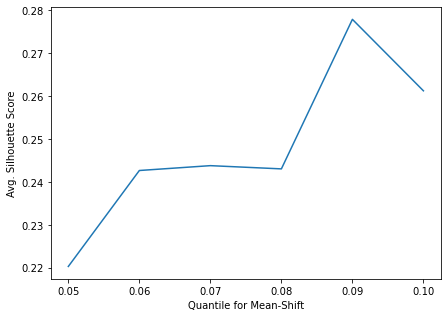

In [121]:
plt.figure(figsize=[7,5])
plt.plot(q_values, silhouette_scores)
plt.xlabel("Quantile for Mean-Shift")
plt.ylabel('Avg. Silhouette Score')
plt.show()

In [122]:
bandwidth = estimate_bandwidth(df_train[cluster_cols], quantile=0.09)
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
df_train['Cluster'] = ms.fit_predict(df_train[cluster_cols])

<ipython-input-122-b879556d3981>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['Cluster'] = ms.fit_predict(df_train[cluster_cols])


In [123]:
df_train.Cluster.nunique()

3

In [124]:
from sklearn import decomposition

pca = decomposition.PCA(n_components=2)
pca_res = pca.fit_transform(df_train[cluster_cols])

df_train['pc1'] = pca_res[:,0]
df_train['pc2'] = pca_res[:,1]

<ipython-input-124-9662bd526dab>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['pc1'] = pca_res[:,0]
<ipython-input-124-9662bd526dab>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train['pc2'] = pca_res[:,1]


In [125]:
pca_res_test = pca.transform(df_test[cluster_cols])
df_test['pc1'] = pca_res_test[:,0]
df_test['pc2'] = pca_res_test[:,1]

<ipython-input-125-3baeabd22382>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pc1'] = pca_res_test[:,0]
<ipython-input-125-3baeabd22382>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['pc2'] = pca_res_test[:,1]


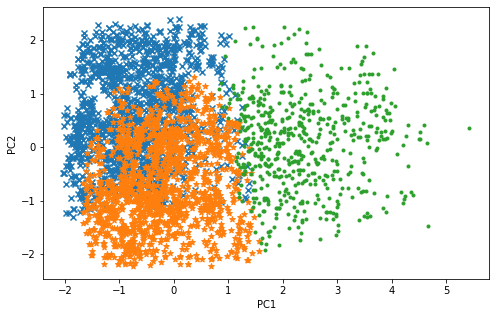

In [126]:
plt.figure(figsize=[8,5])

for clust in range(3):
        temp = df_train[df_train.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, marker=markers[clust])
        
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

In [127]:
df_test['Cluster'] = model.predict(df_test[cluster_cols])
silhouette_avg = silhouette_score(df_test[cluster_cols],df_test['Cluster'])
print(silhouette_avg)

0.08455116292135145


<ipython-input-127-46ad19a8f65a>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['Cluster'] = model.predict(df_test[cluster_cols])


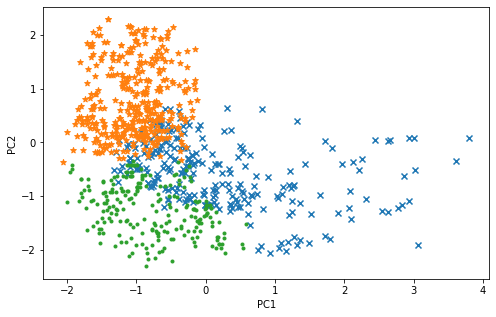

In [128]:
plt.figure(figsize=[8,5])

for clust in range(3):
        temp = df_test[df_test.Cluster == clust]
        plt.scatter(temp.pc1, temp.pc2, marker=markers[clust])
        
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()